# Virtual Internship Program (VIP) by AINE AI

## By: Sourav Sarkar

# Project 9: Image Classification using Deep Learning

### Covid-19 positive and negative patients from X-ray images

<b>About the Project:</b> The outbreak of COVID-19 has had an immense impact on world health and daily life in many countries. The first imaging procedure that played an important role in COVID-19 treatment was the chest X-ray. Radiological imaging is often used as a method that emphasizes the performance of chest X-rays. Recent findings indicate the presence of COVID-19 infections in the patients with irregular findings on chest X-rays. There are many reports on this topic that include machine learning strategies for the identification of COVID-19 using chest X-rays.

This project uses radiological imaging to determine whether the scanned patient has COVID-19 or not.

<b>Aim:</b> With the Chest X - Ray dataset, develop a Deep Learning Model to classify the X Rays of Healthy vs Corona positive patients.
    
<b>Objectives/Exercises:</b>
1.	Import the dataset in python Notebook
2.	Explore the dataframe
3.	Perform data transformation to preprocess the images to convert the images to the same size and greyscale.
4.	Perform normalization techniques on the images
5.	Split the dataset into training and testing sets.
6.	Create a Convolution Neural Network (CNN) model to classify the images into positive and negative COVID-19 infections.
7.	Test the CNN model and critically evaluate the performance of the model


## Datasets
Covid Positive Images:  https://github.com/ieee8023/covid-chestxray-dataset/tree/master/images<br>
Covid Negative (Normal): https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import os
import cv2
import random
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
DATADIR = "./images"
CATEGORIES = ["Covid Negative","Covid Positive"]
IMG_SIZE = 150

### Reading Data

In [3]:
training_data = []
for category in CATEGORIES:
        path = os.path.join(DATADIR,category) 
        class_name = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_name])
            except Exception as e:
                print(e)

In [4]:
training_data[0][0].shape

(150, 150)

In [5]:
len(training_data)

1865

In [6]:
random.shuffle(training_data) # Shuffling the data

### Viewing the data

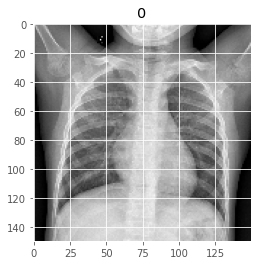

In [43]:
plt.imshow(training_data[100][0], cmap="gray")
plt.title(training_data[100][1])
plt.show()

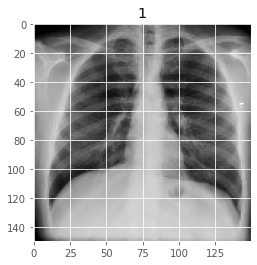

In [44]:
plt.imshow(training_data[1101][0], cmap="gray")
plt.title(training_data[1101][1])
plt.show()

### Creating Model and Layers

In [11]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters = 4, kernel_size = (5,5), activation='relu' , input_shape = (150,150,1)))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 4, kernel_size = (7,7), activation='relu'))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 4)       104       
_________________________________________________________________
average_pooling2d (AveragePo (None, 73, 73, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 4)         788       
_________________________________________________________________
average_pooling2d_1 (Average (None, 33, 33, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4356)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                43570     
Total params: 44,462
Trainable params: 44,462
Non-trainable params: 0
____________________________________________________

### Separating X value and y values. X denotes the chest xray images and y denotes the respective class - covid-19 positive or covid-19 negative

In [13]:
X = []
y = []
for feature, label in training_data:
    X.append(feature)
    y.append(label)
X = np.array(X).reshape(-1,150,150,1)
y = np.array(y)

### Splitting the data into train and test datasets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
X_train.shape

(1492, 150, 150, 1)

In [18]:
value1 = random.randint(0,1492)
print(value1)

1259


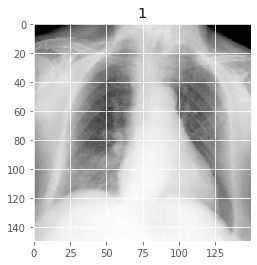

In [45]:
plt.imshow(X_train[value1], cmap="gray")
plt.title(y_train[value1])
plt.show()

In [24]:
value2 = random.randint(0,1492)
print(value2)

1232


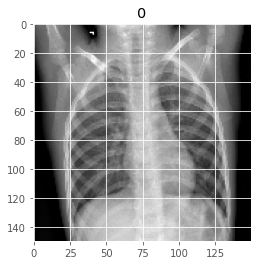

In [46]:
plt.imshow(X_train[value2], cmap="gray")
plt.title(y_train[value2])
plt.show()

### Fitting the model

In [26]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 1, validation_split=0.1)

Epoch 1/20
1342/1342 [==============================] - 27s 12ms/step - loss: 4.6413 - acc: 0.7956 - val_loss: 0.5926 - val_acc: 0.9200
Epoch 2/20
1342/1342 [==============================] - 17s 13ms/step - loss: 0.3827 - acc: 0.9056 - val_loss: 0.1721 - val_acc: 0.9533
Epoch 3/20
1342/1342 [==============================] - 20s 15ms/step - loss: 0.1377 - acc: 0.9626 - val_loss: 0.0980 - val_acc: 0.9867
Epoch 4/20
1342/1342 [==============================] - 23s 17ms/step - loss: 0.0219 - acc: 0.9947 - val_loss: 0.3420 - val_acc: 0.9267: 0s - loss: 0.021
Epoch 5/20
1342/1342 [==============================] - 22s 16ms/step - loss: 0.0342 - acc: 0.9905 - val_loss: 0.0539 - val_acc: 0.9867
Epoch 6/20
1342/1342 [==============================] - 22s 17ms/step - loss: 0.1247 - acc: 0.9700 - val_loss: 0.4867 - val_acc: 0.9133
Epoch 7/20
1342/1342 [==============================] - 22s 17ms/step - loss: 0.1434 - acc: 0.9673 - val_loss: 0.0324 - val_acc: 0.9867
Epoch 8/20
1342/1342 [========

In [27]:
print(type(X_test))

<class 'numpy.ndarray'>


In [28]:
X_test.shape

(373, 150, 150, 1)

### Checking our model's prediction

In [29]:
test1 = random.randint(0,372)
print(test1)

229


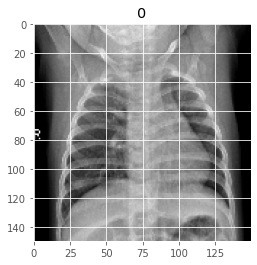

In [47]:
plt.imshow(X_test[test1], cmap="gray")
plt.title(y_test[test1])
plt.show()

In [31]:
model.predict_classes(X_test[test1].reshape(-1,150,150,1))

array([0], dtype=int64)

In [34]:
test2 = random.randint(0,372)
print(test2)

331


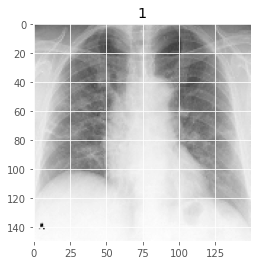

In [48]:
plt.imshow(X_test[test2], cmap="gray")
plt.title(y_test[test2])
plt.show()

In [36]:
model.predict_classes(X_test[test2].reshape(-1,150,150,1))

array([1], dtype=int64)

In [37]:
test3 = random.randint(0,372)
print(test3)

56


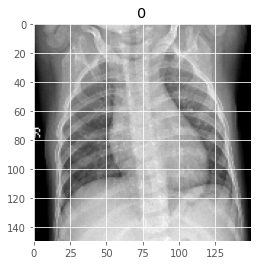

In [49]:
plt.imshow(X_test[test3], cmap="gray")
plt.title(y_test[test3])
plt.show()

In [39]:
model.predict_classes(X_test[test3].reshape(-1,150,150,1))

array([0], dtype=int64)

### Plotting graph for loss and validation loss of our model

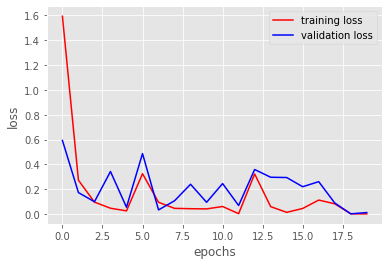

In [40]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Plotting graph for accuracy and validation accuracy of our model

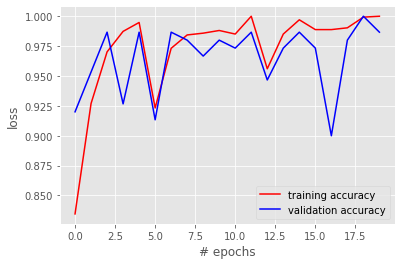

In [41]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],'b',label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Evaluating our model

In [42]:
print(model.evaluate(X_test,y_test))

12/12 [==============================] - 1s 35ms/step - loss: 0.6101 - acc: 0.9651
[0.6100895404815674, 0.9651474356651306]


#### We observe from these evaluations that our model is 96% accurate.